MSD values (timeseries): [-2.05343693e-11  1.56026787e+00  1.91919313e+00 ...  2.20433970e+01
  2.18105733e+01  2.18218457e+01]
At temperature 1.5 K, MSD first crosses 1 at time 1.000 seconds.
MSD values (timeseries): [-2.05343693e-11  1.56026787e+00  1.91919313e+00 ...  2.20433970e+01
  2.18105733e+01  2.18218457e+01]
At temperature 1.0 K, MSD first crosses 1 at time 1.000 seconds.
MSD values (timeseries): [-2.05343693e-11  1.56026787e+00  1.91919313e+00 ...  2.20433970e+01
  2.18105733e+01  2.18218457e+01]
At temperature 0.9 K, MSD first crosses 1 at time 1.000 seconds.
MSD values (timeseries): [-2.05343693e-11  1.56026787e+00  1.91919313e+00 ...  2.20433970e+01
  2.18105733e+01  2.18218457e+01]
At temperature 0.8 K, MSD first crosses 1 at time 1.000 seconds.
MSD values (timeseries): [-2.05343693e-11  1.56026787e+00  1.91919313e+00 ...  2.20433970e+01
  2.18105733e+01  2.18218457e+01]
At temperature 0.7 K, MSD first crosses 1 at time 1.000 seconds.
MSD values (timeseries): [-2.053436

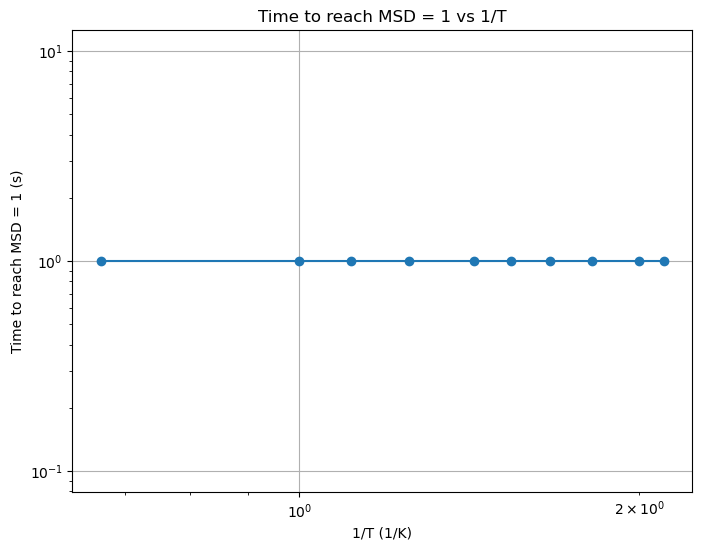

In [15]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import msd
import matplotlib.pyplot as plt
import glob

# Load trajectory files and topology file
trajectory_files = glob.glob("../Inputs/prod/*kalj*.xyz")
topology_file = glob.glob("../Inputs/equil/*kalj*.lammpstrj")[0]

# Load the universe with the topology and trajectory, specifying the topology format
universe = mda.Universe(topology_file, trajectory_files, topology_format='LAMMPSDUMP')

# Set the time step (replace with your actual time step)
dt = 0.001  # Time step in seconds

# Specify your temperatures in Kelvin
temperatures = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.4750]  # Example temperatures
times_to_reach_msd_1 = []  # List to store times

# Loop through the temperatures and calculate MSD for each
for temp in temperatures:
    # Filter atoms based on temperature (modify selection if necessary)
    selection_str = 'all'  # Adjust selection as needed
    selection = universe.select_atoms(selection_str)  # Get the AtomGroup

    # Perform MSD calculation
    msd_analysis = msd.EinsteinMSD(selection, dt=dt)
    msd_analysis.run()

    # Access the timeseries data for MSD
    msd_values = msd_analysis.results['timeseries']  # Access the timeseries directly
    times = msd_analysis.times  # Access the corresponding times

    # Print MSD values for debugging
    print("MSD values (timeseries):", msd_values)

    # Find the time when MSD first crosses 1
    time_at_msd_1 = None
    for i, msd_value in enumerate(msd_values):
        if msd_value >= 1:  # Look for when MSD first reaches 1
            time_at_msd_1 = times[i]
            print(f"At temperature {temp} K, MSD first crosses 1 at time {time_at_msd_1:.3f} seconds.")
            break  # Exit after finding the first occurrence

    # Append the time to the list
    times_to_reach_msd_1.append(time_at_msd_1)

# Prepare data for log-log plot
inverse_temperatures = [1 / temp for temp in temperatures]

# Create a log-log plot of time vs 1/T
plt.figure(figsize=(8, 6))
plt.loglog(inverse_temperatures, times_to_reach_msd_1, marker='o')

# Label the plot
plt.xlabel('1/T (1/K)')
plt.ylabel('Time to reach MSD = 1 (s)')
plt.title('Time to reach MSD = 1 vs 1/T')
plt.grid(True)
plt.show()
